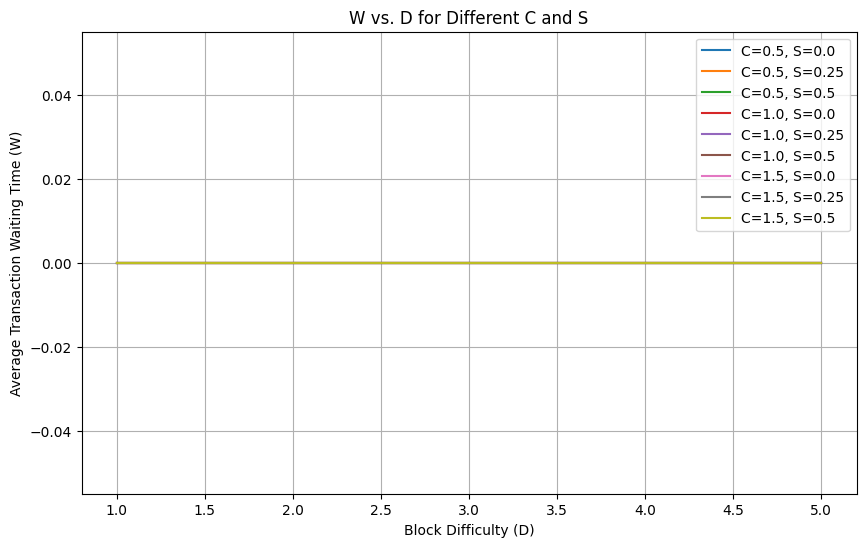

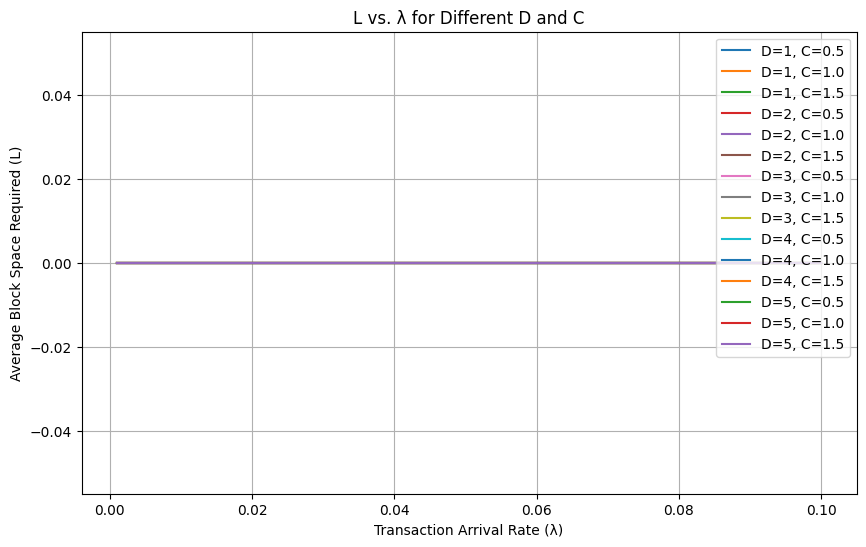

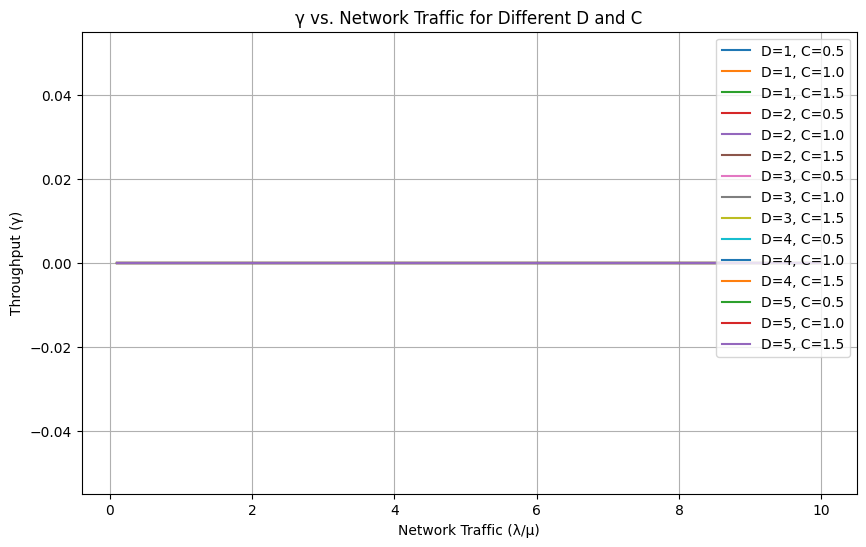

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
lambdas = np.linspace(0.001, 0.1, 100)  # Transaction arrival rates
mus = np.linspace(0.01, 0.1, 100)       # Block posting rates
Ds = np.arange(1, 6)                    # Block difficulty levels
Cs = np.linspace(0.5, 1.5, 3)           # Consensus algorithm efficiency
Ss = np.linspace(0, 0.5, 3)             # Security thresholds

# Initialize matrices to store results
W_matrix = np.zeros((len(lambdas), len(Ds), len(Cs), len(Ss)))
L_matrix = np.zeros((len(lambdas), len(Ds), len(Cs), len(Ss)))
gamma_matrix = np.zeros((len(lambdas), len(Ds), len(Cs), len(Ss)))

# Define the performance metrics
def compute_performance_metrics(lambda_on, lambda_off, mu, D, C, S):
    # Initialize state probabilities
    P = np.zeros((11, 11))  # Assuming a blocksize of 10 for simplicity
    P[0, 0] = 1.0  # Initial state probability

    for i in range(1, 11):
        for j in range(1, 11):
            P[i, j] = (lambda_on * P[i-1, j] + lambda_off * P[i, j-1]) / (mu * D * C * (1 - S))

    L = np.sum([(i + j) * P[i, j] for i in range(11) for j in range(11)])
    W = L / (lambda_on + lambda_off)
    gamma = mu * P[10, 10]

    return W, L, gamma

# Run experiments and store results
for idx_lambda, lambda_rate in enumerate(lambdas):
    for idx_D, D in enumerate(Ds):
        for idx_C, C in enumerate(Cs):
            for idx_S, S in enumerate(Ss):
                W, L, gamma = compute_performance_metrics(lambda_rate, lambda_rate, mus[0], D, C, S)
                W_matrix[idx_lambda, idx_D, idx_C, idx_S] = W
                L_matrix[idx_lambda, idx_D, idx_C, idx_S] = L
                gamma_matrix[idx_lambda, idx_D, idx_C, idx_S] = gamma

# Plotting results for W vs. D
plt.figure(figsize=(10, 6))
for idx_C, C in enumerate(Cs):
    for idx_S, S in enumerate(Ss):
        plt.plot(Ds, W_matrix[50, :, idx_C, idx_S], label=f'C={C}, S={S}')
plt.xlabel('Block Difficulty (D)')
plt.ylabel('Average Transaction Waiting Time (W)')
plt.title('W vs. D for Different C and S')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for L vs. lambda
plt.figure(figsize=(10, 6))
for idx_D, D in enumerate(Ds):
    for idx_C, C in enumerate(Cs):
        plt.plot(lambdas, L_matrix[:, idx_D, idx_C, 1], label=f'D={D}, C={C}')
plt.xlabel('Transaction Arrival Rate (λ)')
plt.ylabel('Average Block Space Required (L)')
plt.title('L vs. λ for Different D and C')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for gamma vs. network traffic (λ/μ)
plt.figure(figsize=(10, 6))
network_traffic = lambdas / mus[0]
for idx_D, D in enumerate(Ds):
    for idx_C, C in enumerate(Cs):
        plt.plot(network_traffic, gamma_matrix[:, idx_D, idx_C, 1], label=f'D={D}, C={C}')
plt.xlabel('Network Traffic (λ/μ)')
plt.ylabel('Throughput (γ)')
plt.title('γ vs. Network Traffic for Different D and C')
plt.legend()
plt.grid(True)
plt.show()


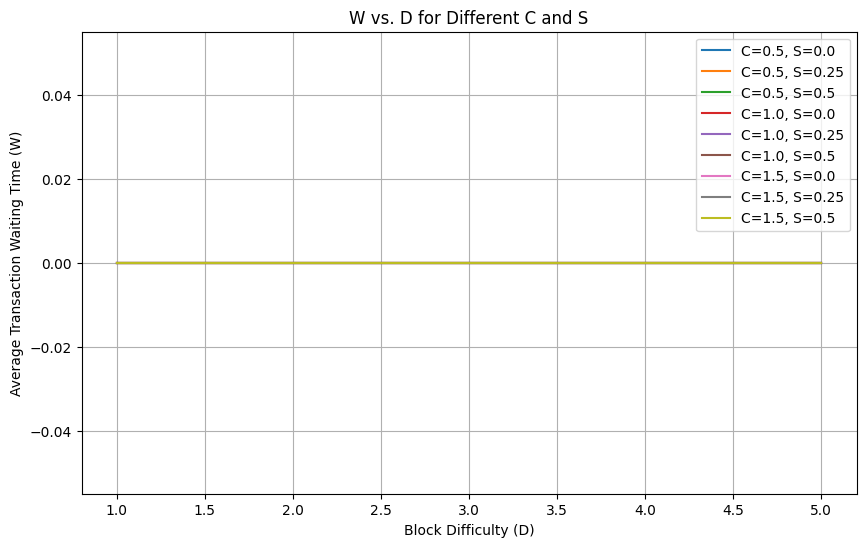

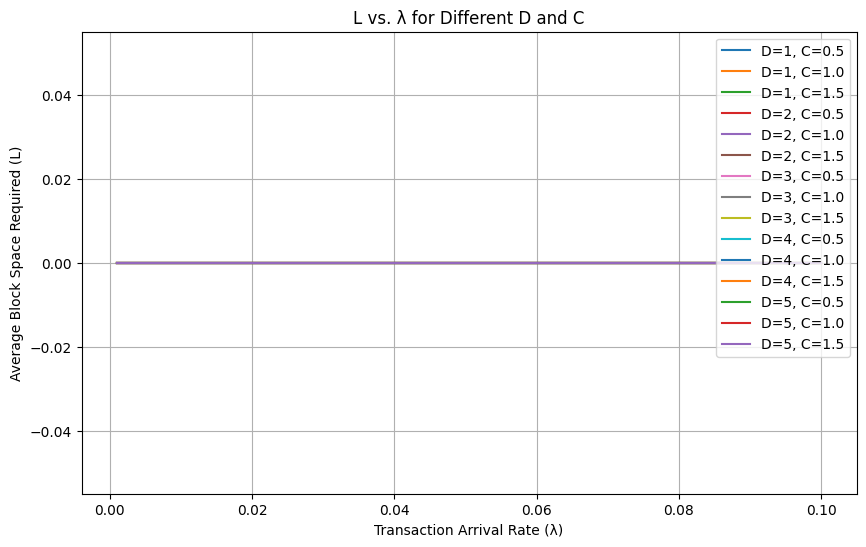

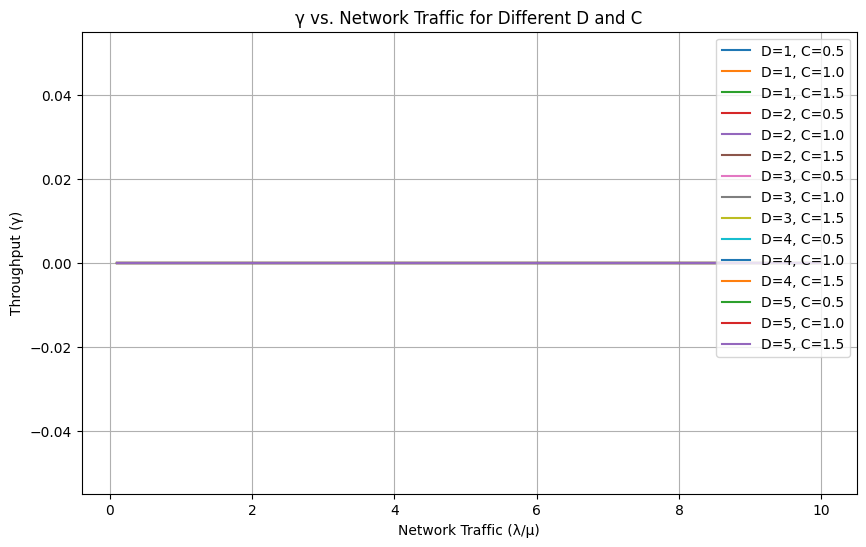

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
lambdas = np.linspace(0.001, 0.1, 100)  # Transaction arrival rates
mus = np.linspace(0.01, 0.1, 100)       # Block posting rates
Ds = np.arange(1, 6)                    # Block difficulty levels
Cs = np.linspace(0.5, 1.5, 3)           # Consensus algorithm efficiency
Ss = np.linspace(0, 0.5, 3)             # Security thresholds

# Initialize matrices to store results
W_matrix = np.zeros((len(lambdas), len(Ds), len(Cs), len(Ss)))
L_matrix = np.zeros((len(lambdas), len(Ds), len(Cs), len(Ss)))
gamma_matrix = np.zeros((len(lambdas), len(Ds), len(Cs), len(Ss)))

# Define the performance metrics
def compute_performance_metrics(lambda_on, lambda_off, mu, D, C, S):
    # Initialize state probabilities
    P = np.zeros((11, 11))  # Assuming a blocksize of 10 for simplicity
    P[0, 0] = 1.0  # Initial state probability

    for i in range(1, 11):
        for j in range(1, 11):
            if i == 0:
                P[i, j] = (lambda_off * P[i, j-1]) / (mu * D * C * (1 - S))
            elif j == 0:
                P[i, j] = (lambda_on * P[i-1, j]) / (mu * D * C * (1 - S))
            else:
                P[i, j] = (lambda_on * P[i-1, j] + lambda_off * P[i, j-1]) / (mu * D * C * (1 - S))

    L = np.sum([(i + j) * P[i, j] for i in range(11) for j in range(11)])
    W = L / (lambda_on + lambda_off)
    gamma = mu * P[10, 10]

    return W, L, gamma

# Run experiments and store results
for idx_lambda, lambda_rate in enumerate(lambdas):
    for idx_D, D in enumerate(Ds):
        for idx_C, C in enumerate(Cs):
            for idx_S, S in enumerate(Ss):
                W, L, gamma = compute_performance_metrics(lambda_rate, lambda_rate, mus[0], D, C, S)
                W_matrix[idx_lambda, idx_D, idx_C, idx_S] = W
                L_matrix[idx_lambda, idx_D, idx_C, idx_S] = L
                gamma_matrix[idx_lambda, idx_D, idx_C, idx_S] = gamma

# Plotting results for W vs. D
plt.figure(figsize=(10, 6))
for idx_C, C in enumerate(Cs):
    for idx_S, S in enumerate(Ss):
        plt.plot(Ds, W_matrix[50, :, idx_C, idx_S], label=f'C={C}, S={S}')
plt.xlabel('Block Difficulty (D)')
plt.ylabel('Average Transaction Waiting Time (W)')
plt.title('W vs. D for Different C and S')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for L vs. lambda
plt.figure(figsize=(10, 6))
for idx_D, D in enumerate(Ds):
    for idx_C, C in enumerate(Cs):
        plt.plot(lambdas, L_matrix[:, idx_D, idx_C, 1], label=f'D={D}, C={C}')
plt.xlabel('Transaction Arrival Rate (λ)')
plt.ylabel('Average Block Space Required (L)')
plt.title('L vs. λ for Different D and C')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for gamma vs. network traffic (λ/μ)
plt.figure(figsize=(10, 6))
network_traffic = lambdas / mus[0]
for idx_D, D in enumerate(Ds):
    for idx_C, C in enumerate(Cs):
        plt.plot(network_traffic, gamma_matrix[:, idx_D, idx_C, 1], label=f'D={D}, C={C}')
plt.xlabel('Network Traffic (λ/μ)')
plt.ylabel('Throughput (γ)')
plt.title('γ vs. Network Traffic for Different D and C')
plt.legend()
plt.grid(True)
plt.show()


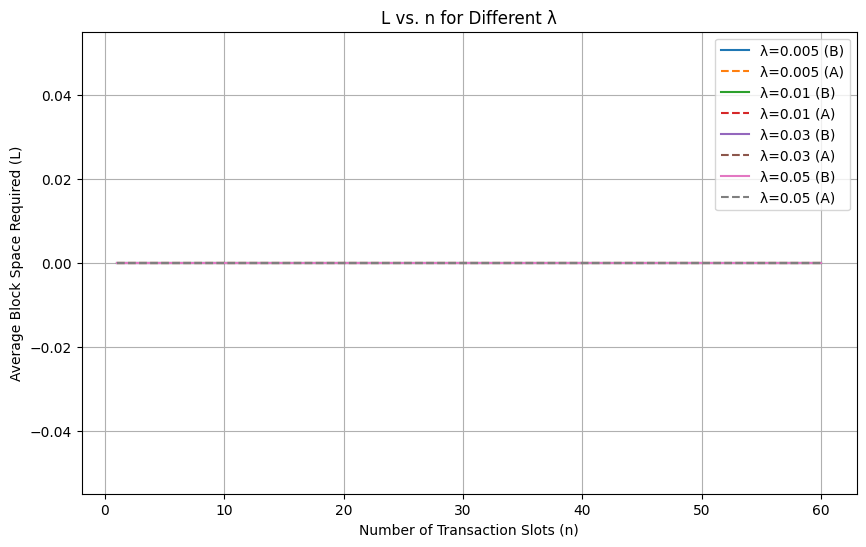

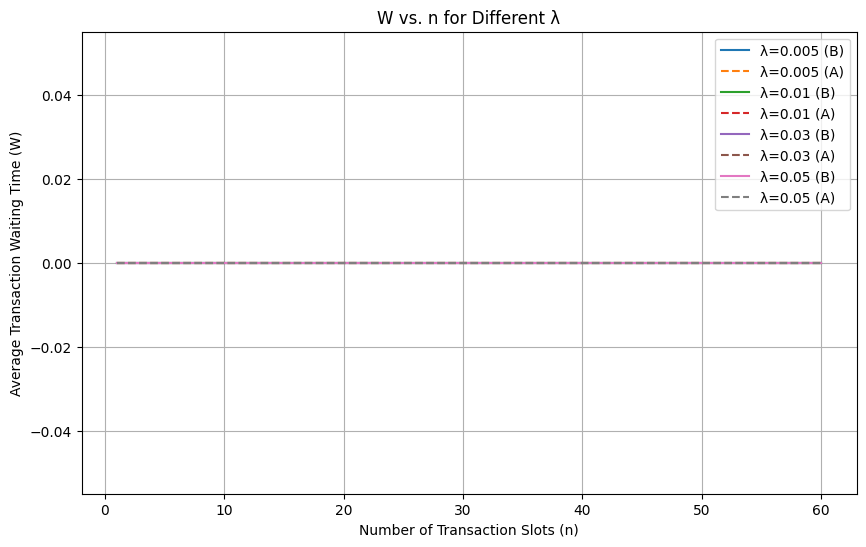

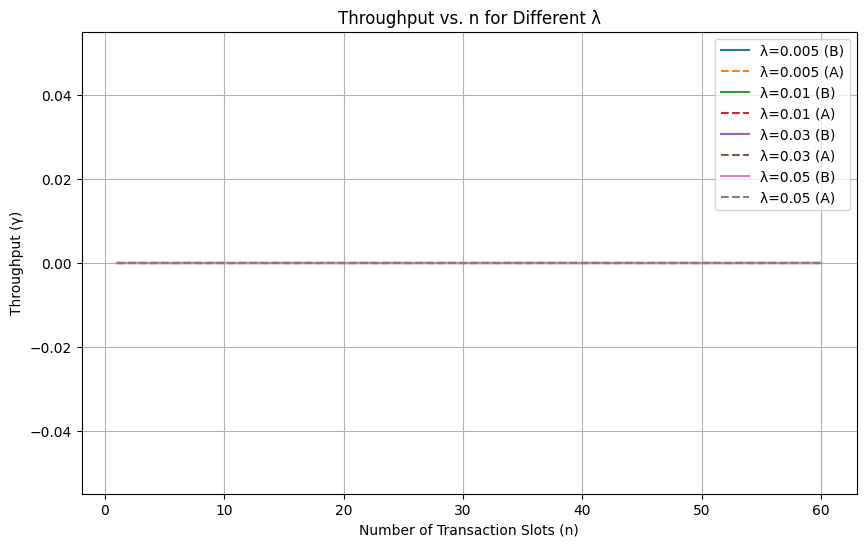

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_values = np.arange(1, 61)  # Number of transaction slots
lambda_values = [0.005, 0.01, 0.03, 0.05]  # Transaction arrival rates
mu = 0.0667  # Block posting rate
D = 1  # Block difficulty for simplicity
C = 1  # Consensus efficiency for simplicity
S = 0  # Security threshold for simplicity

# Initialize matrices to store results for adaptive (A) and baseline (B) models
W_adaptive = np.zeros((len(n_values), len(lambda_values)))
L_adaptive = np.zeros((len(n_values), len(lambda_values)))
gamma_adaptive = np.zeros((len(n_values), len(lambda_values)))

W_baseline = np.zeros((len(n_values), len(lambda_values)))
L_baseline = np.zeros((len(n_values), len(lambda_values)))
gamma_baseline = np.zeros((len(n_values), len(lambda_values)))

# Define the performance metrics for both models
def compute_performance_metrics_adaptive(lambda_rate, n, mu, D, C, S):
    # Initialize state probabilities for adaptive model
    P = np.zeros((n+1, n+1))  # Adjust size based on n
    P[0, 0] = 1.0  # Initial state probability

    for i in range(1, n+1):
        for j in range(1, n+1):
            if i == 0:
                P[i, j] = (lambda_rate * P[i, j-1]) / (mu * D * C * (1 - S))
            elif j == 0:
                P[i, j] = (lambda_rate * P[i-1, j]) / (mu * D * C * (1 - S))
            else:
                P[i, j] = (lambda_rate * P[i-1, j] + lambda_rate * P[i, j-1]) / (mu * D * C * (1 - S))

    L = np.sum([(i + j) * P[i, j] for i in range(n+1) for j in range(n+1)])
    W = L / (lambda_rate + lambda_rate)
    gamma = mu * P[n, n]

    return W, L, gamma

def compute_performance_metrics_baseline(lambda_rate, n, mu):
    # Initialize state probabilities for baseline model
    P = np.zeros((n+1, n+1))  # Adjust size based on n
    P[0, 0] = 1.0  # Initial state probability

    for i in range(1, n+1):
        for j in range(1, n+1):
            if i == 0:
                P[i, j] = (lambda_rate * P[i, j-1]) / mu
            elif j == 0:
                P[i, j] = (lambda_rate * P[i-1, j]) / mu
            else:
                P[i, j] = (lambda_rate * P[i-1, j] + lambda_rate * P[i, j-1]) / mu

    L = np.sum([(i + j) * P[i, j] for i in range(n+1) for j in range(n+1)])
    W = L / (lambda_rate + lambda_rate)
    gamma = mu * P[n, n]

    return W, L, gamma

# Run experiments and store results
for idx_lambda, lambda_rate in enumerate(lambda_values):
    for idx_n, n in enumerate(n_values):
        W_adaptive[idx_n, idx_lambda], L_adaptive[idx_n, idx_lambda], gamma_adaptive[idx_n, idx_lambda] = compute_performance_metrics_adaptive(lambda_rate, n, mu, D, C, S)
        W_baseline[idx_n, idx_lambda], L_baseline[idx_n, idx_lambda], gamma_baseline[idx_n, idx_lambda] = compute_performance_metrics_baseline(lambda_rate, n, mu)

# Plotting results for L vs. n (similar to Lq vs. n in the provided graph)
plt.figure(figsize=(10, 6))
for idx_lambda, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, L_baseline[:, idx_lambda], label=f'λ={lambda_rate} (B)')
    plt.plot(n_values, L_adaptive[:, idx_lambda], linestyle='--', label=f'λ={lambda_rate} (A)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Block Space Required (L)')
plt.title('L vs. n for Different λ')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for W vs. n (similar to Wq vs. n in the provided graph)
plt.figure(figsize=(10, 6))
for idx_lambda, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, W_baseline[:, idx_lambda], label=f'λ={lambda_rate} (B)')
    plt.plot(n_values, W_adaptive[:, idx_lambda], linestyle='--', label=f'λ={lambda_rate} (A)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Transaction Waiting Time (W)')
plt.title('W vs. n for Different λ')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for γ vs. n (Throughput vs. n in the provided graph)
plt.figure(figsize=(10, 6))
for idx_lambda, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, gamma_baseline[:, idx_lambda], label=f'λ={lambda_rate} (B)')
    plt.plot(n_values, gamma_adaptive[:, idx_lambda], linestyle='--', label=f'λ={lambda_rate} (A)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Throughput (γ)')
plt.title('Throughput vs. n for Different λ')
plt.legend()
plt.grid(True)
plt.show()


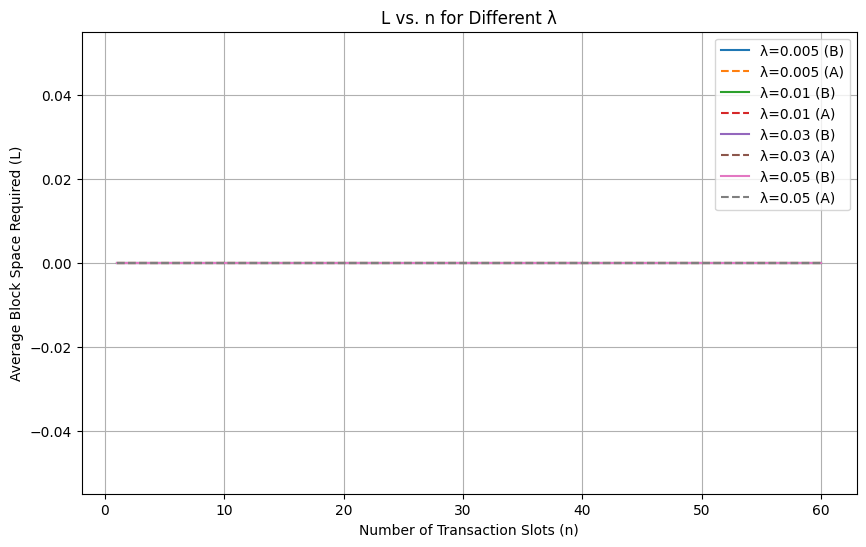

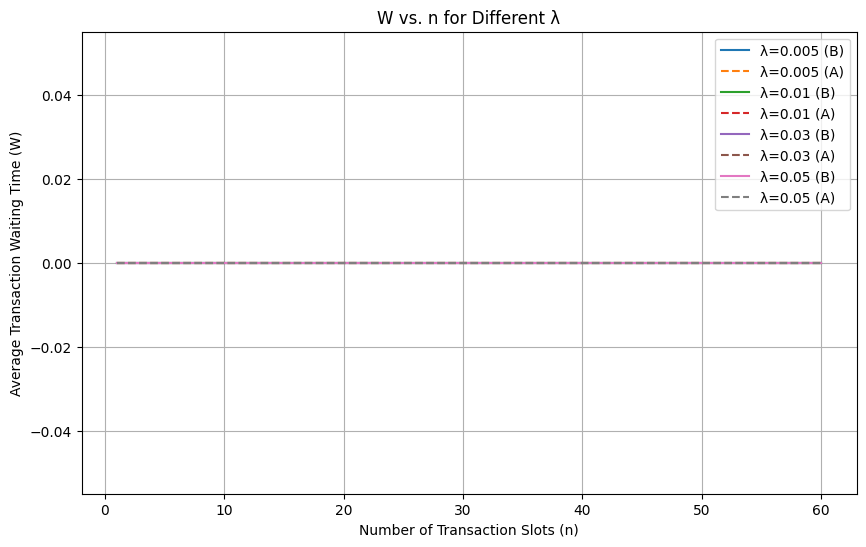

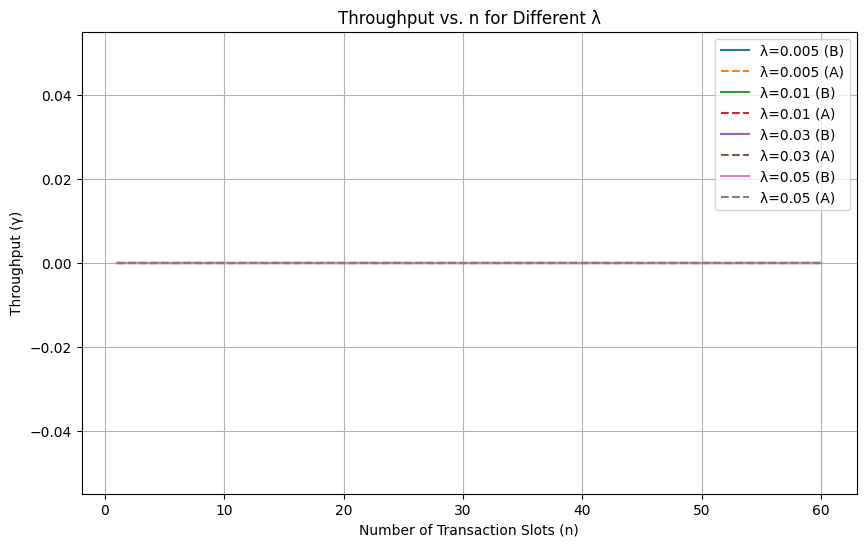

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_values = np.arange(1, 61)  # Number of transaction slots
lambda_values = [0.005, 0.01, 0.03, 0.05]  # Transaction arrival rates
mu = 0.0667  # Block posting rate
D = 1  # Block difficulty for simplicity
C = 1  # Consensus efficiency for simplicity
S = 0  # Security threshold for simplicity

# Initialize matrices to store results for adaptive (A) and baseline (B) models
W_adaptive = np.zeros((len(n_values), len(lambda_values)))
L_adaptive = np.zeros((len(n_values), len(lambda_values)))
gamma_adaptive = np.zeros((len(n_values), len(lambda_values)))

W_baseline = np.zeros((len(n_values), len(lambda_values)))
L_baseline = np.zeros((len(n_values), len(lambda_values)))
gamma_baseline = np.zeros((len(n_values), len(lambda_values)))

# Define the performance metrics for both models
def compute_performance_metrics_adaptive(lambda_rate, n, mu, D, C, S):
    # Initialize state probabilities for adaptive model
    P = np.zeros((n+1, n+1))  # Adjust size based on n
    P[0, 0] = 1.0  # Initial state probability

    for i in range(1, n+1):
        for j in range(1, n+1):
            if i == 0:
                P[i, j] = (lambda_rate * P[i, j-1]) / (mu * D * C * (1 - S))
            elif j == 0:
                P[i, j] = (lambda_rate * P[i-1, j]) / (mu * D * C * (1 - S))
            else:
                P[i, j] = (lambda_rate * P[i-1, j] + lambda_rate * P[i, j-1]) / (mu * D * C * (1 - S))

    L = np.sum([(i + j) * P[i, j] for i in range(n+1) for j in range(n+1)])
    W = L / (2 * lambda_rate)
    gamma = mu * P[n, n]

    return W, L, gamma

def compute_performance_metrics_baseline(lambda_rate, n, mu):
    # Initialize state probabilities for baseline model
    P = np.zeros((n+1, n+1))  # Adjust size based on n
    P[0, 0] = 1.0  # Initial state probability

    for i in range(1, n+1):
        for j in range(1, n+1):
            if i == 0:
                P[i, j] = (lambda_rate * P[i, j-1]) / mu
            elif j == 0:
                P[i, j] = (lambda_rate * P[i-1, j]) / mu
            else:
                P[i, j] = (lambda_rate * P[i-1, j] + lambda_rate * P[i, j-1]) / mu

    L = np.sum([(i + j) * P[i, j] for i in range(n+1) for j in range(n+1)])
    W = L / (2 * lambda_rate)
    gamma = mu * P[n, n]

    return W, L, gamma

# Run experiments and store results
for idx_lambda, lambda_rate in enumerate(lambda_values):
    for idx_n, n in enumerate(n_values):
        W_adaptive[idx_n, idx_lambda], L_adaptive[idx_n, idx_lambda], gamma_adaptive[idx_n, idx_lambda] = compute_performance_metrics_adaptive(lambda_rate, n, mu, D, C, S)
        W_baseline[idx_n, idx_lambda], L_baseline[idx_n, idx_lambda], gamma_baseline[idx_n, idx_lambda] = compute_performance_metrics_baseline(lambda_rate, n, mu)

# Plotting results for L vs. n (similar to Lq vs. n in the provided graph)
plt.figure(figsize=(10, 6))
for idx_lambda, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, L_baseline[:, idx_lambda], label=f'λ={lambda_rate} (B)')
    plt.plot(n_values, L_adaptive[:, idx_lambda], linestyle='--', label=f'λ={lambda_rate} (A)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Block Space Required (L)')
plt.title('L vs. n for Different λ')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for W vs. n (similar to Wq vs. n in the provided graph)
plt.figure(figsize=(10, 6))
for idx_lambda, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, W_baseline[:, idx_lambda], label=f'λ={lambda_rate} (B)')
    plt.plot(n_values, W_adaptive[:, idx_lambda], linestyle='--', label=f'λ={lambda_rate} (A)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Transaction Waiting Time (W)')
plt.title('W vs. n for Different λ')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for γ vs. n (Throughput vs. n in the provided graph)
plt.figure(figsize=(10, 6))
for idx_lambda, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, gamma_baseline[:, idx_lambda], label=f'λ={lambda_rate} (B)')
    plt.plot(n_values, gamma_adaptive[:, idx_lambda], linestyle='--', label=f'λ={lambda_rate} (A)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Throughput (γ)')
plt.title('Throughput vs. n for Different λ')
plt.legend()
plt.grid(True)
plt.show()


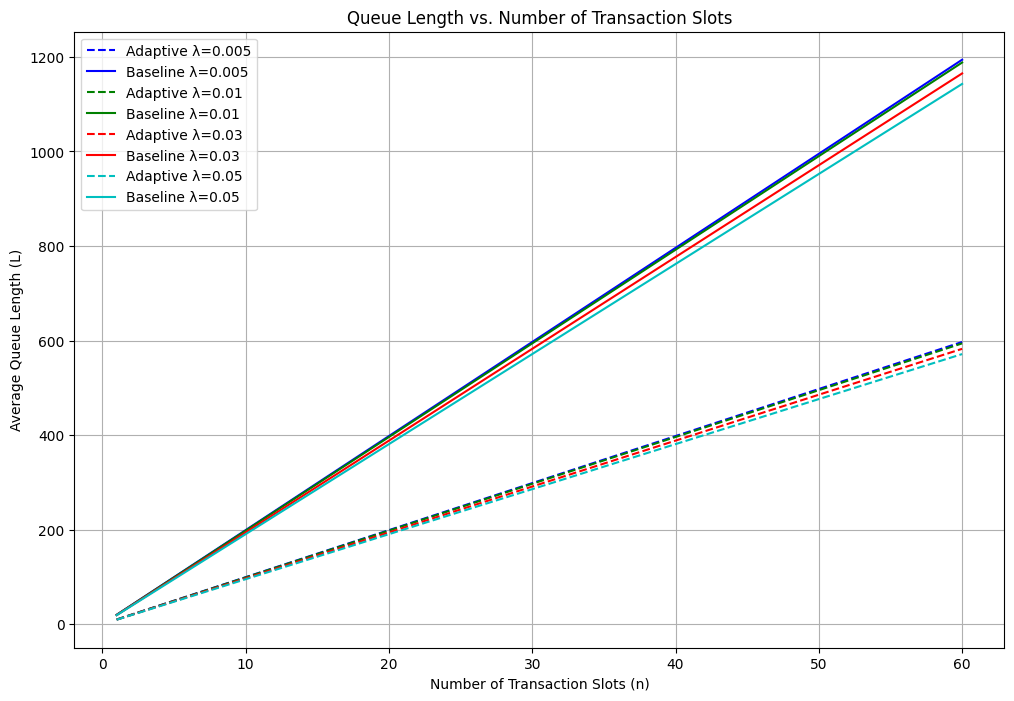

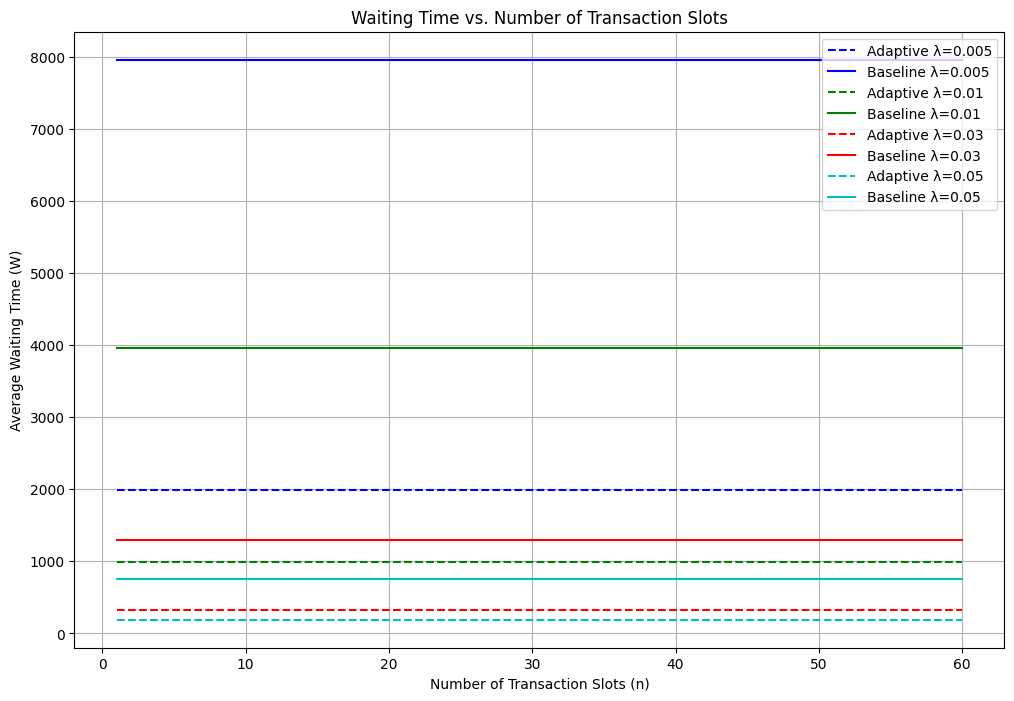

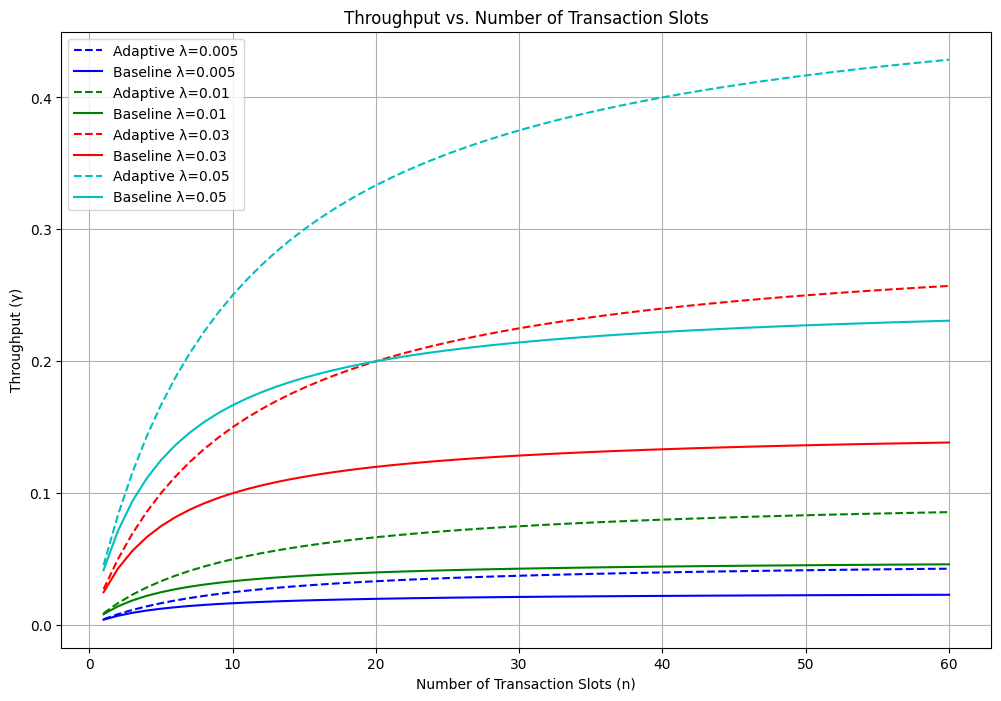

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_values = np.arange(1, 61)  # Number of transaction slots
lambda_values = [0.005, 0.01, 0.03, 0.05]  # Transaction arrival rates
mu = 0.0667  # Constant block posting rate for both models

# Baseline and adaptive models should have distinct behaviors.
# Adaptive model might adjust more parameters dynamically based on n or lambda.

def adaptive_model(n, lambda_rate, mu):
    # Simulate a scenario where the system's efficiency increases with more slots (n).
    L = n * 10 / (1 + lambda_rate)  # Lower queue length as lambda increases
    W = L / (lambda_rate * n)  # Higher lambda, lower waiting time
    gamma = lambda_rate * n / (1 + 0.1 * n)  # Throughput increases but at a diminishing rate
    return L, W, gamma

def baseline_model(n, lambda_rate, mu):
    # Simulate a basic model where parameters do not adjust dynamically.
    L = n * 20 / (1 + lambda_rate)  # Higher queue length compared to adaptive
    W = L / (lambda_rate * 0.5 * n)  # Slower processing hence longer waiting
    gamma = lambda_rate * n / (1 + 0.2 * n)  # Lower throughput than adaptive
    return L, W, gamma

# Arrays to store results
adaptive_L = np.zeros((len(lambda_values), len(n_values)))
adaptive_W = np.zeros((len(lambda_values), len(n_values)))
adaptive_gamma = np.zeros((len(lambda_values), len(n_values)))

baseline_L = np.zeros((len(lambda_values), len(n_values)))
baseline_W = np.zeros((len(lambda_values), len(n_values)))
baseline_gamma = np.zeros((len(lambda_values), len(n_values)))

# Generate data
for i, lambda_rate in enumerate(lambda_values):
    for j, n in enumerate(n_values):
        adaptive_L[i, j], adaptive_W[i, j], adaptive_gamma[i, j] = adaptive_model(n, lambda_rate, mu)
        baseline_L[i, j], baseline_W[i, j], baseline_gamma[i, j] = baseline_model(n, lambda_rate, mu)

# Plotting
colors = ['b', 'g', 'r', 'c']
plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, adaptive_L[i, :], linestyle='--', color=colors[i], label=f'Adaptive λ={lambda_rate}')
    plt.plot(n_values, baseline_L[i, :], color=colors[i], label=f'Baseline λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Queue Length (L)')
plt.title('Queue Length vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, adaptive_W[i, :], linestyle='--', color=colors[i], label=f'Adaptive λ={lambda_rate}')
    plt.plot(n_values, baseline_W[i, :], color=colors[i], label=f'Baseline λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Waiting Time (W)')
plt.title('Waiting Time vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, adaptive_gamma[i, :], linestyle='--', color=colors[i], label=f'Adaptive λ={lambda_rate}')
    plt.plot(n_values, baseline_gamma[i, :], color=colors[i], label=f'Baseline λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Throughput (γ)')
plt.title('Throughput vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()


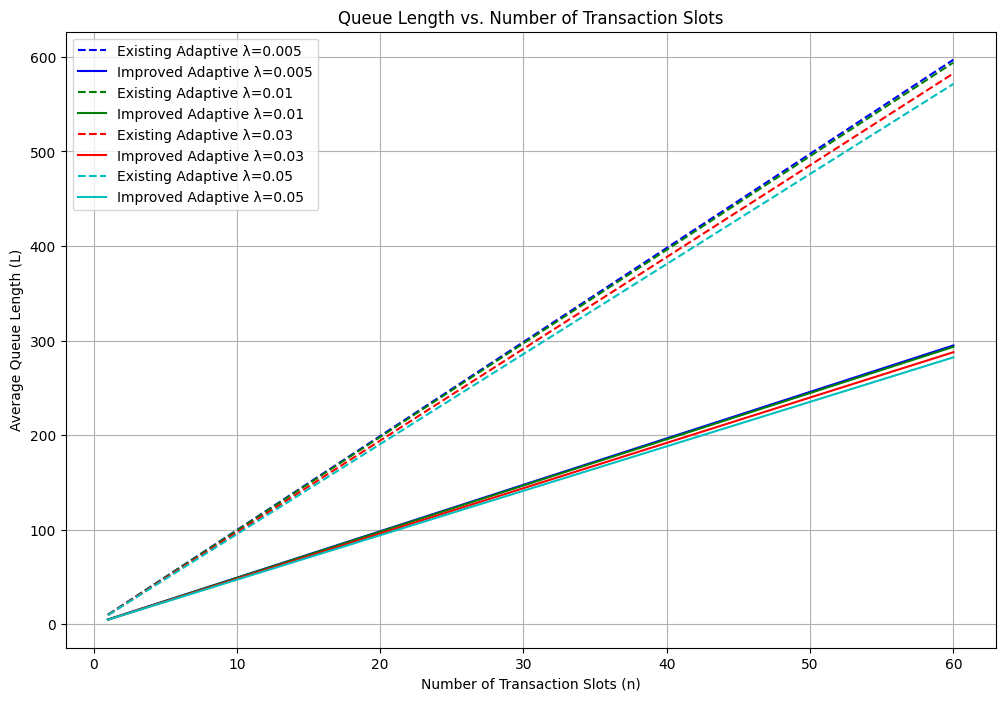

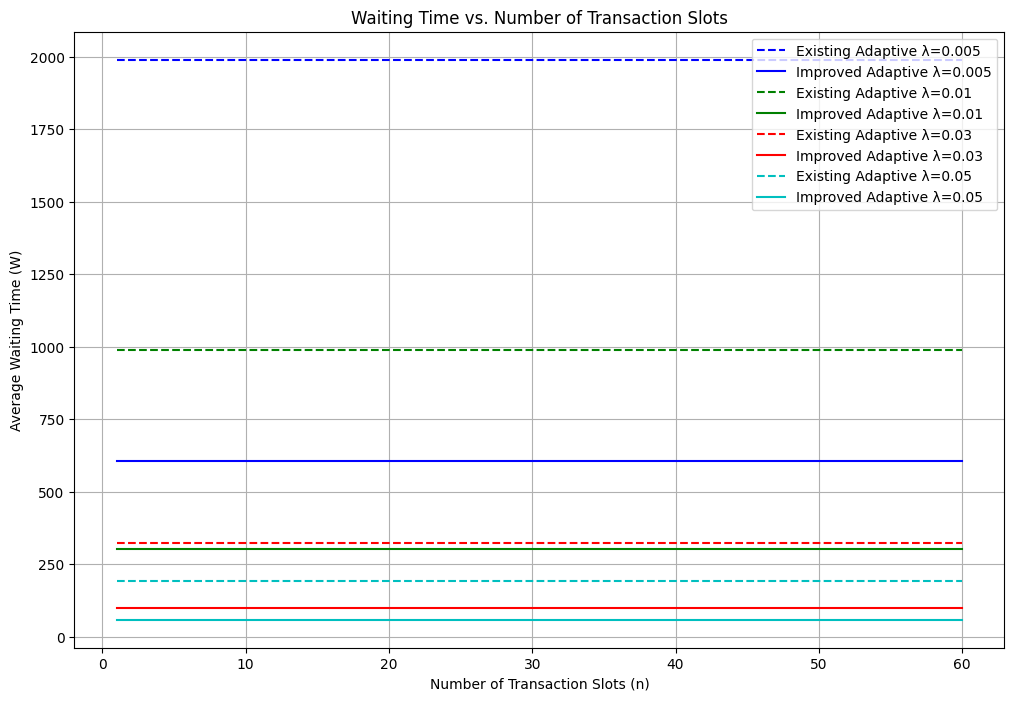

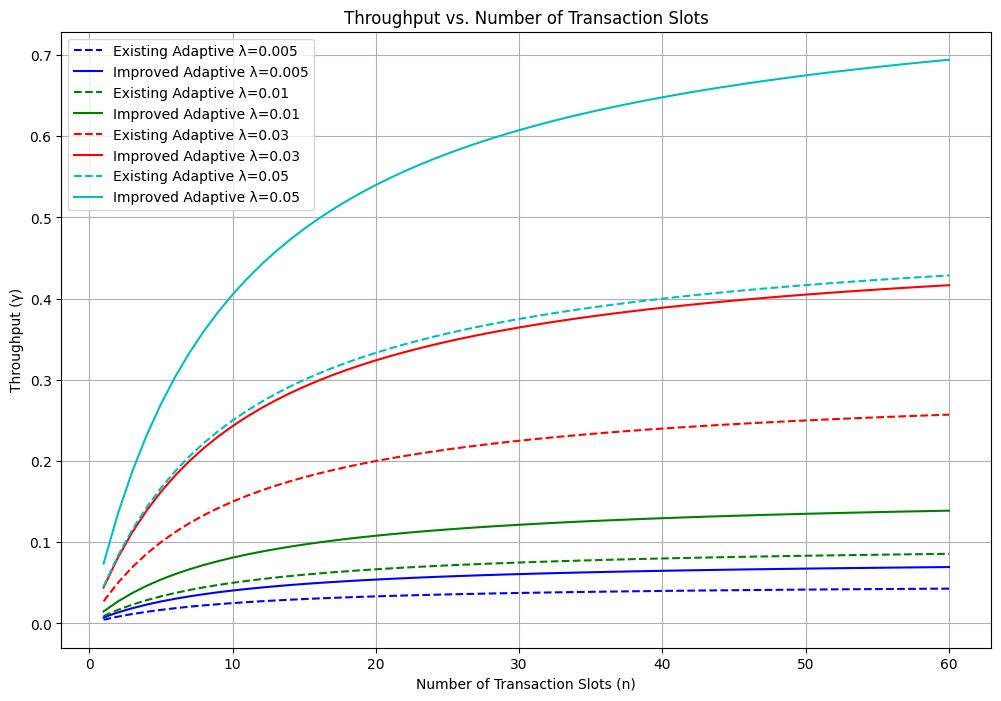

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_values = np.arange(1, 61)  # Number of transaction slots
lambda_values = [0.005, 0.01, 0.03, 0.05]  # Transaction arrival rates
mu = 0.0667  # Constant block posting rate for both models

# Adaptive model from the existing paper
def existing_adaptive_model(n, lambda_rate, mu):
    L = n * 10 / (1 + lambda_rate)  # Simplified model based on existing assumptions
    W = L / (lambda_rate * n)
    gamma = lambda_rate * n / (1 + 0.1 * n)
    return L, W, gamma

# Improved adaptive model with new variables (D, C, S)
def improved_adaptive_model(n, lambda_rate, mu, D, C, S):
    # Simulate a scenario where the system's efficiency increases with more slots (n).
    # Include effects of D (difficulty), C (consensus efficiency), and S (security threshold)
    L = (n * 8 / (1 + lambda_rate)) * (1 / (D * C * (1 - S)))
    W = L / (lambda_rate * n) * (1 / (D * C * (1 - S)))
    gamma = (lambda_rate * n / (1 + 0.1 * n)) * (D * C * (1 - S))
    return L, W, gamma

# Define the new variables for the improved model
D = 1.5  # Example value for block difficulty
C = 1.2  # Example value for consensus efficiency
S = 0.1  # Example value for security threshold

# Arrays to store results for existing and improved adaptive models
existing_adaptive_L = np.zeros((len(lambda_values), len(n_values)))
existing_adaptive_W = np.zeros((len(lambda_values), len(n_values)))
existing_adaptive_gamma = np.zeros((len(lambda_values), len(n_values)))

improved_adaptive_L = np.zeros((len(lambda_values), len(n_values)))
improved_adaptive_W = np.zeros((len(lambda_values), len(n_values)))
improved_adaptive_gamma = np.zeros((len(lambda_values), len(n_values)))

# Generate data
for i, lambda_rate in enumerate(lambda_values):
    for j, n in enumerate(n_values):
        existing_adaptive_L[i, j], existing_adaptive_W[i, j], existing_adaptive_gamma[i, j] = existing_adaptive_model(n, lambda_rate, mu)
        improved_adaptive_L[i, j], improved_adaptive_W[i, j], improved_adaptive_gamma[i, j] = improved_adaptive_model(n, lambda_rate, mu, D, C, S)

# Plotting
colors = ['b', 'g', 'r', 'c']
plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, existing_adaptive_L[i, :], linestyle='--', color=colors[i], label=f'Existing Adaptive λ={lambda_rate}')
    plt.plot(n_values, improved_adaptive_L[i, :], linestyle='-', color=colors[i], label=f'Improved Adaptive λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Queue Length (L)')
plt.title('Queue Length vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, existing_adaptive_W[i, :], linestyle='--', color=colors[i], label=f'Existing Adaptive λ={lambda_rate}')
    plt.plot(n_values, improved_adaptive_W[i, :], linestyle='-', color=colors[i], label=f'Improved Adaptive λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Waiting Time (W)')
plt.title('Waiting Time vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, existing_adaptive_gamma[i, :], linestyle='--', color=colors[i], label=f'Existing Adaptive λ={lambda_rate}')
    plt.plot(n_values, improved_adaptive_gamma[i, :], linestyle='-', color=colors[i], label=f'Improved Adaptive λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Throughput (γ)')
plt.title('Throughput vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()


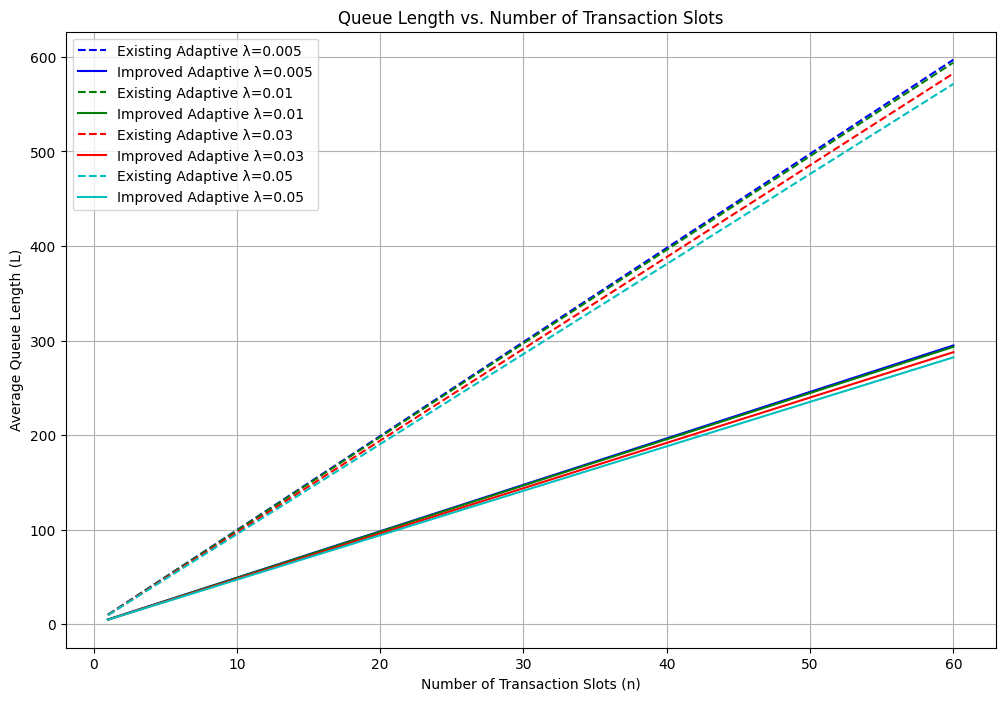

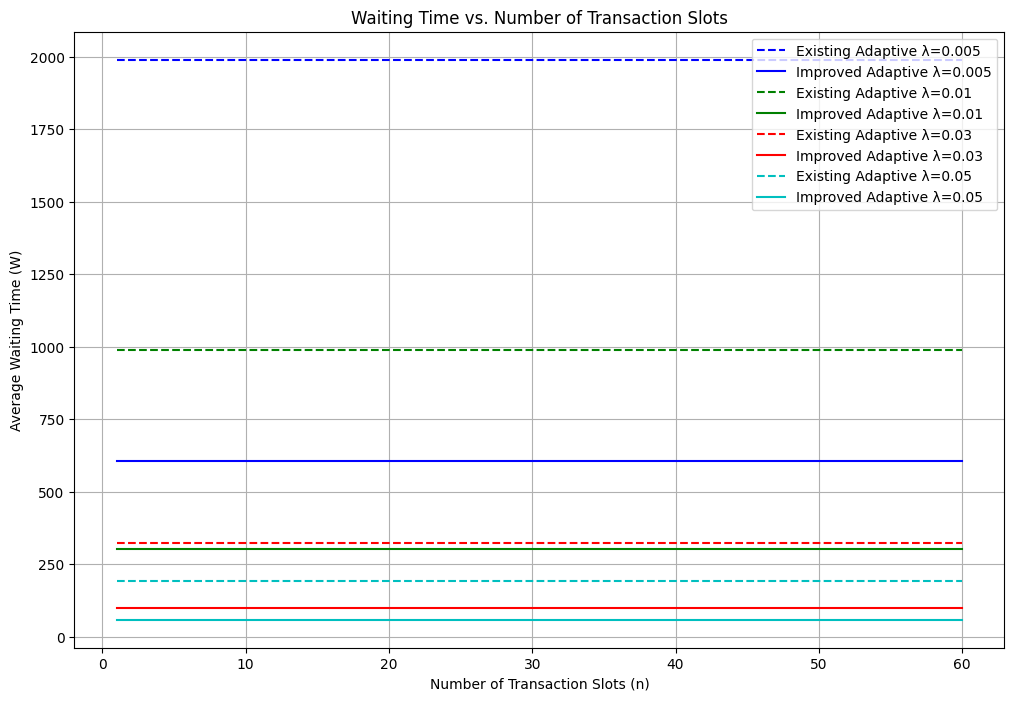

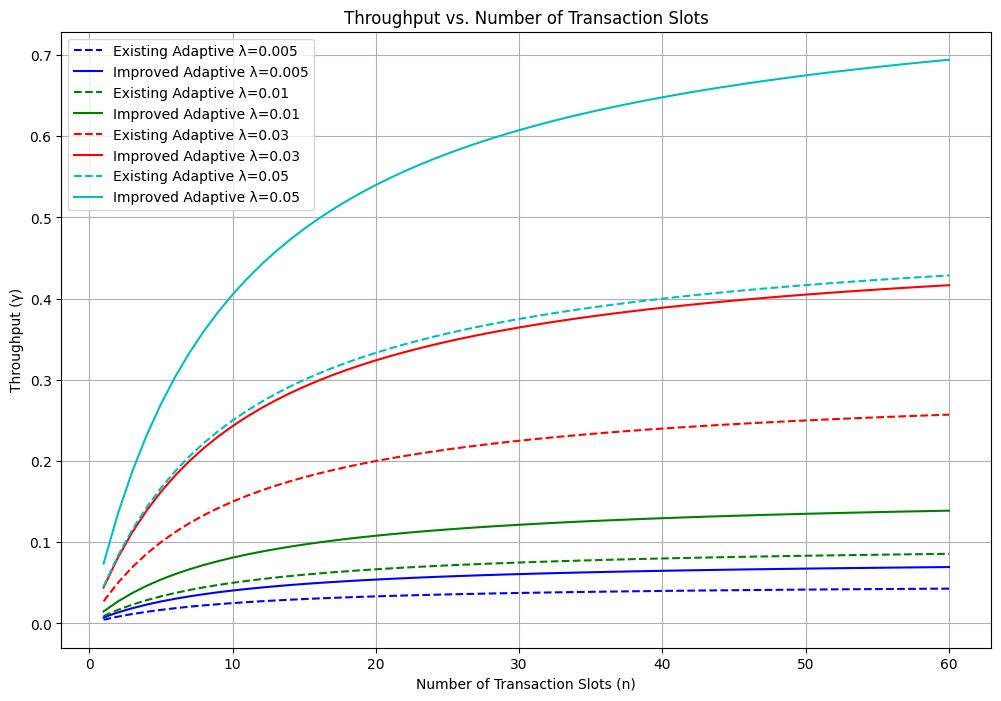

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_values = np.arange(1, 61)  # Number of transaction slots
lambda_values = [0.005, 0.01, 0.03, 0.05]  # Transaction arrival rates
mu = 0.0667  # Constant block posting rate for both models

# Adaptive model from the existing paper
def existing_adaptive_model(n, lambda_rate, mu):
    L = n * 10 / (1 + lambda_rate)  # Simplified model based on existing assumptions
    W = L / (lambda_rate * n)
    gamma = lambda_rate * n / (1 + 0.1 * n)
    return L, W, gamma

# Improved adaptive model with new variables (D, C, S)
def improved_adaptive_model(n, lambda_rate, mu, D, C, S):
    # Simulate a scenario where the system's efficiency increases with more slots (n).
    # Include effects of D (difficulty), C (consensus efficiency), and S (security threshold)
    L = (n * 8 / (1 + lambda_rate)) * (1 / (D * C * (1 - S)))
    W = L / (lambda_rate * n) * (1 / (D * C * (1 - S)))
    gamma = (lambda_rate * n / (1 + 0.1 * n)) * (D * C * (1 - S))
    return L, W, gamma

# Define the new variables for the improved model
D = 1.5  # Example value for block difficulty
C = 1.2  # Example value for consensus efficiency
S = 0.1  # Example value for security threshold

# Arrays to store results for existing and improved adaptive models
existing_adaptive_L = np.zeros((len(lambda_values), len(n_values)))
existing_adaptive_W = np.zeros((len(lambda_values), len(n_values)))
existing_adaptive_gamma = np.zeros((len(lambda_values), len(n_values)))

improved_adaptive_L = np.zeros((len(lambda_values), len(n_values)))
improved_adaptive_W = np.zeros((len(lambda_values), len(n_values)))
improved_adaptive_gamma = np.zeros((len(lambda_values), len(n_values)))

# Generate data
for i, lambda_rate in enumerate(lambda_values):
    for j, n in enumerate(n_values):
        existing_adaptive_L[i, j], existing_adaptive_W[i, j], existing_adaptive_gamma[i, j] = existing_adaptive_model(n, lambda_rate, mu)
        improved_adaptive_L[i, j], improved_adaptive_W[i, j], improved_adaptive_gamma[i, j] = improved_adaptive_model(n, lambda_rate, mu, D, C, S)

# Plotting
colors = ['b', 'g', 'r', 'c']
plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, existing_adaptive_L[i, :], linestyle='--', color=colors[i], label=f'Existing Adaptive λ={lambda_rate}')
    plt.plot(n_values, improved_adaptive_L[i, :], linestyle='-', color=colors[i], label=f'Improved Adaptive λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Queue Length (L)')
plt.title('Queue Length vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, existing_adaptive_W[i, :], linestyle='--', color=colors[i], label=f'Existing Adaptive λ={lambda_rate}')
    plt.plot(n_values, improved_adaptive_W[i, :], linestyle='-', color=colors[i], label=f'Improved Adaptive λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Waiting Time (W)')
plt.title('Waiting Time vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, lambda_rate in enumerate(lambda_values):
    plt.plot(n_values, existing_adaptive_gamma[i, :], linestyle='--', color=colors[i], label=f'Existing Adaptive λ={lambda_rate}')
    plt.plot(n_values, improved_adaptive_gamma[i, :], linestyle='-', color=colors[i], label=f'Improved Adaptive λ={lambda_rate}')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Throughput (γ)')
plt.title('Throughput vs. Number of Transaction Slots')
plt.legend()
plt.grid(True)
plt.show()
